### 📌데이터 전처리

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [5]:
data1 = pd.read_csv('final4.csv', encoding = 'euc-kr')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162899 entries, 0 to 4162898
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   base_date      object 
 2   city_x         object 
 3   emd_nm         object 
 4   em_cnt         float64
 5   em_g           float64
 6   pay_amt        float64
 7   base_year      float64
 8   base_month     float64
 9   base_day       float64
 10  resid_reg_pop  float64
 11  foreign_pop    float64
 12  total_pop      float64
 13  외식_use_cnt     float64
 14  외식_use_amt     float64
 15  장보기_use_cnt    float64
 16  장보기_use_amt    float64
 17  배달_use_cnt     float64
 18  배달_use_amt     float64
dtypes: float64(15), int64(1), object(3)
memory usage: 603.4+ MB


In [6]:
data1 = data1.dropna()

In [7]:
data1.emd_nm.unique()

array(['외도동', '아라동', '노형동', '도두동', '오라동', '삼양동', '이도2동', '일도2동', '건입동',
       '화북동', '봉개동', '삼도1동', '이도1동', '용담2동', '연동', '이호동', '동홍동', '대정읍',
       '영천동', '서홍동', '효돈동', '중문동', '대륜동', '남원읍', '대천동', '안덕면', '예래동',
       '표선면', '성산읍', '정방동', '송산동', '천지동', '중앙동', '삼도2동', '애월읍', '일도1동',
       '용담1동', '조천읍', '구좌읍', '한림읍', '한경면'], dtype=object)

In [8]:
data1.columns

Index(['Unnamed: 0', 'base_date', 'city_x', 'emd_nm', 'em_cnt', 'em_g',
       'pay_amt', 'base_year', 'base_month', 'base_day', 'resid_reg_pop',
       'foreign_pop', 'total_pop', '외식_use_cnt', '외식_use_amt', '장보기_use_cnt',
       '장보기_use_amt', '배달_use_cnt', '배달_use_amt'],
      dtype='object')

In [9]:
data = data1.copy()
data = data.drop(['Unnamed: 0', 'city_x', 'base_date', 'base_year', 'base_month', 'base_day'], axis=1)

data.head(2)

,emd_nm,em_cnt,em_g,pay_amt,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt
0,외도동,2.0,15500.0,464.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0
1,외도동,2.0,15500.0,464.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0


In [10]:
EMD = data['emd_nm']

In [11]:
len(EMD)

4070522

In [12]:
data['emd_nm'] = data['emd_nm'].astype('category').cat.codes
data.head(2)

,emd_nm,em_cnt,em_g,pay_amt,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt
0,23,2.0,15500.0,464.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0
1,23,2.0,15500.0,464.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0


In [13]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(data))
output = minMaxScaler.transform(data)
data = pd.DataFrame(output, columns=data.columns, index=list(data.index.values))
data.head(3)

MinMaxScaler(copy=True, feature_range=(0, 1))


,emd_nm,em_cnt,em_g,pay_amt,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt
0,0.575,0.001585,0.114054,0.050304,0.347060,0.042893,0.338474,0.18261,0.184294,0.195964,0.127447,0.003524,0.002233
1,0.575,0.001585,0.114054,0.050304,0.341986,0.058452,0.334877,0.18261,0.184294,0.195964,0.127447,0.003524,0.002233
2,0.575,0.009509,0.127667,0.056266,0.347060,0.042893,0.338474,0.18261,0.184294,0.195964,0.127447,0.003524,0.002233


In [14]:
data.to_csv('data4clustering0906.csv', index=False)  # dropna, numeric화, scaling 마친 클러스터링용 데이터 저장

### 📌클러스터링_전체변수

In [15]:
data = pd.read_csv('data4clustering0906.csv', encoding = 'utf-8')  
#dropna, numeric화, scaling 마친 클러스터링용 데이터 불러오기

CPU times: user 8.6 s, sys: 2.28 s, total: 10.9 s
Wall time: 8.69 s
n_cluster : 1, inertia : 1952612.3100412746
CPU times: user 16.7 s, sys: 1.52 s, total: 18.2 s
Wall time: 16.7 s
n_cluster : 2, inertia : 1051686.4853442106
CPU times: user 26.1 s, sys: 1.58 s, total: 27.7 s
Wall time: 24.7 s
n_cluster : 3, inertia : 841303.6161432458
CPU times: user 25.4 s, sys: 2.15 s, total: 27.5 s
Wall time: 23.5 s
n_cluster : 4, inertia : 710152.6636899621
CPU times: user 41.3 s, sys: 2.73 s, total: 44 s
Wall time: 38.9 s
n_cluster : 5, inertia : 628061.5020871232
CPU times: user 42.2 s, sys: 3.22 s, total: 45.4 s
Wall time: 39.2 s
n_cluster : 6, inertia : 553251.6733133318
CPU times: user 54.9 s, sys: 3.75 s, total: 58.7 s
Wall time: 51.5 s
n_cluster : 7, inertia : 490637.16364749917
CPU times: user 1min 24s, sys: 4.63 s, total: 1min 29s
Wall time: 1min 20s
n_cluster : 8, inertia : 446786.5352112897


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


CPU times: user 1min 39s, sys: 19.8 s, total: 1min 58s
Wall time: 1min 32s
n_cluster : 9, inertia : 426268.62638875237


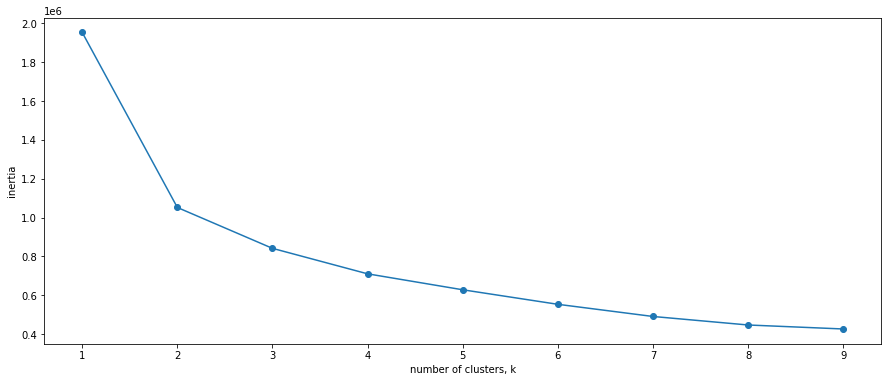

In [16]:
from sklearn.cluster import KMeans   
import matplotlib.pyplot as plt    
%matplotlib inline    


# k-means clustering & inertia simulation
ks = range(1,10)   
inertias = []   
for k in ks :
    model = KMeans(n_clusters = k, n_init = 5)
    %time model.fit(data)  
    inertias.append(model.inertia_)   
    print('n_cluster : {}, inertia : {}'.format(k, model.inertia_)) 
    
plt.figure(figsize = (15, 6))   
plt.plot(ks, inertias, '-o')    
plt.xlabel('number of clusters, k')    
plt.ylabel('inertia')    
plt.xticks(ks)    
plt.show()

In [17]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# 결과 확인
result_by_sklearn = data.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,emd_nm,em_cnt,em_g,pay_amt,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,cluster
0,0.575,0.001585,0.114054,0.050304,0.347060,0.042893,0.338474,0.18261,0.184294,0.195964,0.127447,0.003524,0.002233,1
1,0.575,0.001585,0.114054,0.050304,0.341986,0.058452,0.334877,0.18261,0.184294,0.195964,0.127447,0.003524,0.002233,1
2,0.575,0.009509,0.127667,0.056266,0.347060,0.042893,0.338474,0.18261,0.184294,0.195964,0.127447,0.003524,0.002233,1
3,0.575,0.009509,0.127667,0.056266,0.341986,0.058452,0.334877,0.18261,0.184294,0.195964,0.127447,0.003524,0.002233,1
4,0.575,0.023772,0.304268,0.134107,0.347060,0.042893,0.338474,0.18261,0.184294,0.195964,0.127447,0.003524,0.002233,1


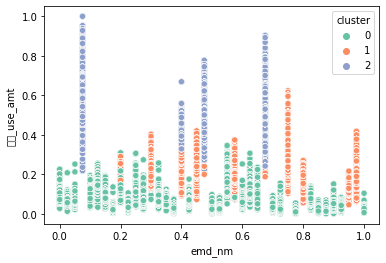

In [18]:
sns.scatterplot(x="emd_nm", y="외식_use_amt", hue="cluster", data=result_by_sklearn, palette="Set2");

In [19]:
result_by_sklearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070522 entries, 0 to 4070521
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   emd_nm         float64
 1   em_cnt         float64
 2   em_g           float64
 3   pay_amt        float64
 4   resid_reg_pop  float64
 5   foreign_pop    float64
 6   total_pop      float64
 7   외식_use_cnt     float64
 8   외식_use_amt     float64
 9   장보기_use_cnt    float64
 10  장보기_use_amt    float64
 11  배달_use_cnt     float64
 12  배달_use_amt     float64
 13  cluster        int32  
dtypes: float64(13), int32(1)
memory usage: 419.3 MB


cluster
0    1938425
1    1249113
2     882984
Name: emd_nm, dtype: int64


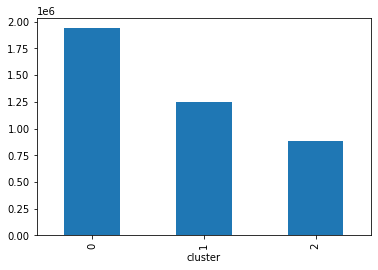

In [20]:
cluster_size = result_by_sklearn.groupby(['cluster'])['emd_nm'].count()
print(cluster_size)
cluster_size.plot(kind = 'bar')

In [21]:
data1 = data1.reset_index(drop=True)
data1.rename(columns = {'emd_nm' : '읍면동'}, inplace = True)
maybe = result_by_sklearn.join(data1['읍면동'])
maybe #서귀포0, 제주시1

,emd_nm,em_cnt,em_g,pay_amt,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,cluster,읍면동
0,0.575,0.001585,0.114054,0.050304,0.347060,0.042893,0.338474,0.182610,0.184294,0.195964,0.127447,0.003524,0.002233,1,외도동
1,0.575,0.001585,0.114054,0.050304,0.341986,0.058452,0.334877,0.182610,0.184294,0.195964,0.127447,0.003524,0.002233,1,외도동
2,0.575,0.009509,0.127667,0.056266,0.347060,0.042893,0.338474,0.182610,0.184294,0.195964,0.127447,0.003524,0.002233,1,외도동
3,0.575,0.009509,0.127667,0.056266,0.341986,0.058452,0.334877,0.182610,0.184294,0.195964,0.127447,0.003524,0.002233,1,외도동
4,0.575,0.023772,0.304268,0.134107,0.347060,0.042893,0.338474,0.182610,0.184294,0.195964,0.127447,0.003524,0.002233,1,외도동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070517,0.600,0.014263,0.125460,0.055291,0.085818,0.016821,0.083229,0.068029,0.059514,0.062087,0.035534,0.070825,0.027351,0,용담1동
4070518,0.600,0.031696,0.200147,0.087923,0.092473,0.005046,0.088678,0.068029,0.059514,0.062087,0.035534,0.070825,0.027351,0,용담1동
4070519,0.600,0.031696,0.200147,0.087923,0.085818,0.016821,0.083229,0.068029,0.059514,0.062087,0.035534,0.070825,0.027351,0,용담1동
4070520,0.600,0.022187,0.224430,0.098764,0.092473,0.005046,0.088678,0.068029,0.059514,0.062087,0.035534,0.070825,0.027351,0,용담1동


In [22]:
maybe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070522 entries, 0 to 4070521
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   emd_nm         float64
 1   em_cnt         float64
 2   em_g           float64
 3   pay_amt        float64
 4   resid_reg_pop  float64
 5   foreign_pop    float64
 6   total_pop      float64
 7   외식_use_cnt     float64
 8   외식_use_amt     float64
 9   장보기_use_cnt    float64
 10  장보기_use_amt    float64
 11  배달_use_cnt     float64
 12  배달_use_amt     float64
 13  cluster        int32  
 14  읍면동            object 
dtypes: float64(13), int32(1), object(1)
memory usage: 450.3+ MB


In [23]:
emdlist = maybe.읍면동.unique()
print(len(emdlist))
emdlist

41


array(['외도동', '아라동', '노형동', '도두동', '오라동', '삼양동', '이도2동', '일도2동', '건입동',
       '화북동', '봉개동', '삼도1동', '이도1동', '용담2동', '연동', '이호동', '동홍동', '대정읍',
       '영천동', '서홍동', '효돈동', '중문동', '대륜동', '남원읍', '대천동', '안덕면', '예래동',
       '표선면', '성산읍', '정방동', '송산동', '천지동', '중앙동', '삼도2동', '애월읍', '일도1동',
       '용담1동', '조천읍', '구좌읍', '한림읍', '한경면'], dtype=object)

In [24]:
#클러스터 내의 읍면동 분포
c0=[]
c1=[]
c2=[]
count = 0

for i in emdlist:
    plz = maybe[maybe['읍면동']==i]
    #print(i, len(plz))
    cnt = plz.cluster.value_counts()
    #print(cnt)
    if len(cnt)==1:
        if cnt.index[0] == 0:
            c0.append(i)
        elif cnt.index[0] == 1:
            c1.append(i)
        else:
            c2.append(i)
    else:
        count += 1

        a = cnt.index[0]
        b = cnt.index[1]
        print(i, ': 클러스터', a, cnt[a],'클러스터', b, cnt[b])
        if cnt[a] > cnt[b]:
            if cnt.index[0] == 0:
                c0.append(i)
            elif cnt.index[0] == 1:
                c1.append(i)
            else:
                c2.append(i)
        else:
            if cnt.index[1] == 0:
                c0.append(i)
            elif cnt.index[1] == 1:
                c1.append(i)
            else:
                c2.append(i)
print(count)            
print(len(c0), c0)    
print(len(c1), c1)    
print(len(c2), c2)    

외도동 : 클러스터 1 145679 클러스터 0 3209
아라동 : 클러스터 1 243711 클러스터 2 17163
삼양동 : 클러스터 1 122924 클러스터 0 30986
이도2동 : 클러스터 2 267062 클러스터 1 2280
일도2동 : 클러스터 1 186269 클러스터 2 27
연동 : 클러스터 2 260779 클러스터 1 4277
동홍동 : 클러스터 0 81978 클러스터 1 2006
애월읍 : 클러스터 1 148805 클러스터 2 15
8
30 ['도두동', '오라동', '건입동', '봉개동', '삼도1동', '이도1동', '용담2동', '이호동', '동홍동', '대정읍', '영천동', '서홍동', '효돈동', '중문동', '대륜동', '남원읍', '대천동', '안덕면', '예래동', '표선면', '성산읍', '정방동', '송산동', '천지동', '중앙동', '삼도2동', '일도1동', '용담1동', '구좌읍', '한경면']
8 ['외도동', '아라동', '삼양동', '일도2동', '화북동', '애월읍', '조천읍', '한림읍']
3 ['노형동', '이도2동', '연동']


In [25]:
forjoin = maybe['cluster']
joined = data1.join(forjoin)
joined.head()

,Unnamed: 0,base_date,city_x,읍면동,em_cnt,em_g,pay_amt,base_year,base_month,base_day,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,cluster
0,0,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1
1,1,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1
2,2,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1
3,3,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1
4,4,2018-01-01,제주시,외도동,16.0,41350.0,1237.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1


In [26]:
forjoin2 = data1['읍면동']
joined = data1.join(forjoin)

joined2 = result_by_sklearn.join(data1['읍면동'])
joined.head()

,Unnamed: 0,base_date,city_x,읍면동,em_cnt,em_g,pay_amt,base_year,base_month,base_day,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,cluster
0,0,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1
1,1,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1
2,2,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1
3,3,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1
4,4,2018-01-01,제주시,외도동,16.0,41350.0,1237.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1


In [27]:
def grouping(x):
    if x in c0:
        return 0
    elif x in c1:
        return 1
    else:
        return 2

In [28]:
joined["그룹"] = ''
joined["그룹"] = joined["읍면동"].apply(grouping)
joined.head(2)

,Unnamed: 0,base_date,city_x,읍면동,em_cnt,em_g,pay_amt,base_year,base_month,base_day,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,cluster,그룹
0,0,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1,1
1,1,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,1,1


In [29]:
joined[joined['그룹'] == 0].count()

Unnamed: 0       1906236
base_date        1906236
city_x           1906236
읍면동              1906236
em_cnt           1906236
em_g             1906236
pay_amt          1906236
base_year        1906236
base_month       1906236
base_day         1906236
resid_reg_pop    1906236
foreign_pop      1906236
total_pop        1906236
외식_use_cnt       1906236
외식_use_amt       1906236
장보기_use_cnt      1906236
장보기_use_amt      1906236
배달_use_cnt       1906236
배달_use_amt       1906236
cluster          1906236
그룹               1906236
dtype: int64

In [30]:
joined.to_csv('afterclustering_all_0906.csv', index=False)

### 📌PCA

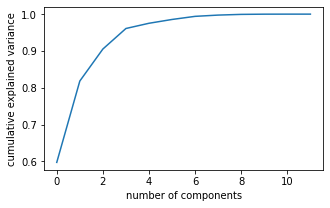

In [31]:
df = pd.read_csv('final4.csv', encoding='euc-kr', index_col=1)
df = df.drop(['Unnamed: 0', 'city_x', 'base_year', 'base_month', 'base_day', 'emd_nm'], axis=1)
df = df.dropna()

X = df.values
sc = StandardScaler()
X_std = sc.fit_transform(X)

pca = PCA()
X_pca = pca.fit(X_std)

plt.subplots(figsize=(5, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### 📌클러스터링_PCA변수

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 <a list of 41 Text major ticklabel objects>)

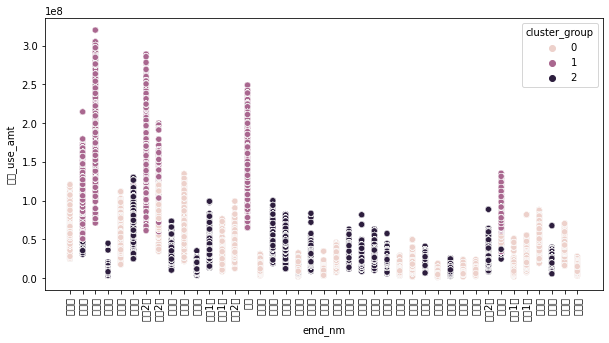

In [32]:
df = pd.read_csv('final4.csv', encoding='euc-kr', usecols=['em_g', 'total_pop', '외식_use_amt', '장보기_use_cnt', '배달_use_amt', 'pay_amt', 'emd_nm']).dropna()
r_df = pd.read_csv('final4.csv', encoding='euc-kr', usecols=['em_g', 'total_pop', '외식_use_amt', '장보기_use_cnt', '배달_use_amt', 'pay_amt', 'emd_nm'])

X = df
y = df['emd_nm']
le = LabelEncoder()
X['emd_nm'] = le.fit_transform(X['emd_nm'])
y = le.transform(y)

cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

kmeans = KMeans(n_clusters=3, random_state=0) 
identified_clusters=kmeans.fit(X)

labels = kmeans.labels_
df['cluster_group']=labels
df['emd_nm']=r_df['emd_nm']

matplotlib.rcParams['figure.figsize'] = (10, 5)
sns.scatterplot(x='emd_nm', y='외식_use_amt', hue='cluster_group', data=df)
plt.xticks(rotation=90)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


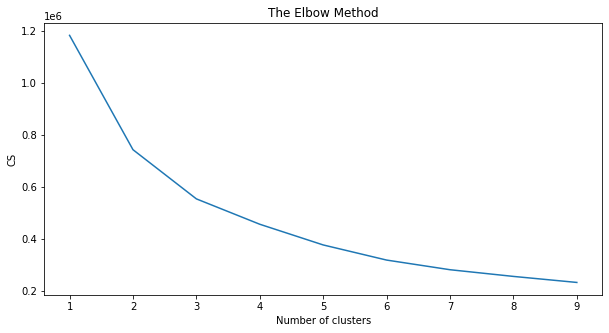

In [33]:
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# 클러스터링 결과 EDA

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('final4.csv',encoding='euc-kr')
df.head()

,Unnamed: 0,base_date,city_x,emd_nm,em_cnt,em_g,pay_amt,base_year,base_month,base_day,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt
0,0,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0
1,1,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0
2,2,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0
3,3,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0
4,4,2018-01-01,제주시,외도동,16.0,41350.0,1237.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")

import warnings
warnings.filterwarnings('ignore')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162899 entries, 0 to 4162898
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   base_date      object 
 2   city_x         object 
 3   emd_nm         object 
 4   em_cnt         float64
 5   em_g           float64
 6   pay_amt        float64
 7   base_year      float64
 8   base_month     float64
 9   base_day       float64
 10  resid_reg_pop  float64
 11  foreign_pop    float64
 12  total_pop      float64
 13  외식_use_cnt     float64
 14  외식_use_amt     float64
 15  장보기_use_cnt    float64
 16  장보기_use_amt    float64
 17  배달_use_cnt     float64
 18  배달_use_amt     float64
dtypes: float64(15), int64(1), object(3)
memory usage: 603.4+ MB


In [38]:
df['target']=df.emd_nm

In [39]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df.target)

LabelEncoder()

In [40]:
le.classes_

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '알수없음', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [41]:
le.transform(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '알수없음', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '표선면', '한경면', '한림읍', '화북동', '효돈동'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

In [42]:
df.head()

,Unnamed: 0,base_date,city_x,emd_nm,em_cnt,em_g,pay_amt,base_year,base_month,base_day,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,target
0,0,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동
1,1,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동
2,2,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동
3,3,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동
4,4,2018-01-01,제주시,외도동,16.0,41350.0,1237.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동


In [43]:
df['emd_encoding']=le.transform(df.target)
df.head()

,Unnamed: 0,base_date,city_x,emd_nm,em_cnt,em_g,pay_amt,base_year,base_month,base_day,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,target,emd_encoding
0,0,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
1,1,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
2,2,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
3,3,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
4,4,2018-01-01,제주시,외도동,16.0,41350.0,1237.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24


In [44]:
df

,Unnamed: 0,base_date,city_x,emd_nm,em_cnt,em_g,pay_amt,base_year,base_month,base_day,resid_reg_pop,foreign_pop,total_pop,외식_use_cnt,외식_use_amt,장보기_use_cnt,장보기_use_amt,배달_use_cnt,배달_use_amt,target,emd_encoding
0,0,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
1,1,2018-01-01,제주시,외도동,2.0,15500.0,464.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
2,2,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
3,3,2018-01-01,제주시,외도동,7.0,17350.0,519.0,2018.0,1.0,1.0,10345.0,157.0,10502.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
4,4,2018-01-01,제주시,외도동,16.0,41350.0,1237.0,2018.0,1.0,1.0,10483.0,120.0,10603.0,1970.0,60084211.0,2328.0,76856574.0,15.0,359412.0,외도동,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162894,4162894,2021-06-26,NaN,일도1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,9491359.0,256.0,9363294.0,101.0,2083426.0,일도1동,30
4162895,4162895,2021-06-27,NaN,일도1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.0,6345848.0,312.0,11134559.0,96.0,2404340.0,일도1동,30
4162896,4162896,2021-06-28,NaN,일도1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.0,8204433.0,267.0,7491054.0,50.0,1118672.0,일도1동,30
4162897,4162897,2021-06-29,NaN,일도1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,8595265.0,241.0,11513217.0,50.0,1078985.0,일도1동,30


In [45]:
make_group = df[['em_g','resid_reg_pop','foreign_pop','total_pop','외식_use_amt','장보기_use_amt','배달_use_amt']].groupby([df['base_date'],df['base_year'],df['base_month'],df['emd_nm'],df['emd_encoding']])
df2 = pd.DataFrame(make_group.sum()).reset_index()
df2

,base_date,base_year,base_month,emd_nm,emd_encoding,em_g,resid_reg_pop,foreign_pop,total_pop,외식_use_amt,장보기_use_amt,배달_use_amt
0,2018-01-01,2018.0,1.0,건입동,0,2783900.0,274400.0,6384.0,280784.0,1.848309e+09,1.598653e+09,3.024560e+06
1,2018-01-01,2018.0,1.0,남원읍,2,2479200.0,840928.0,27632.0,868560.0,2.229783e+09,3.820992e+09,5.668890e+07
2,2018-01-01,2018.0,1.0,노형동,3,11174800.0,6884601.0,204981.0,7089582.0,4.838784e+10,5.516968e+10,5.639705e+08
3,2018-01-01,2018.0,1.0,대륜동,4,1637400.0,269460.0,3560.0,273020.0,1.225607e+09,1.660201e+09,1.586912e+07
4,2018-01-01,2018.0,1.0,대정읍,5,1779900.0,506040.0,36432.0,542472.0,1.431907e+09,1.981770e+09,2.458142e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
50336,2021-06-30,2021.0,6.0,표선면,37,1274800.0,382757.0,10354.0,393111.0,1.128260e+09,4.375920e+09,1.150585e+08
50337,2021-06-30,2021.0,6.0,한경면,38,1947700.0,540322.0,19883.0,560205.0,1.791304e+09,3.467478e+09,8.232400e+07
50338,2021-06-30,2021.0,6.0,한림읍,39,6128800.0,2165664.0,329460.0,2495124.0,8.731312e+09,1.669691e+10,1.123768e+09
50339,2021-06-30,2021.0,6.0,화북동,40,4226400.0,1458000.0,19800.0,1477800.0,7.447995e+09,1.396550e+10,1.604462e+09


In [46]:
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

mean   > 3070325.680121571
median > 2125900.0


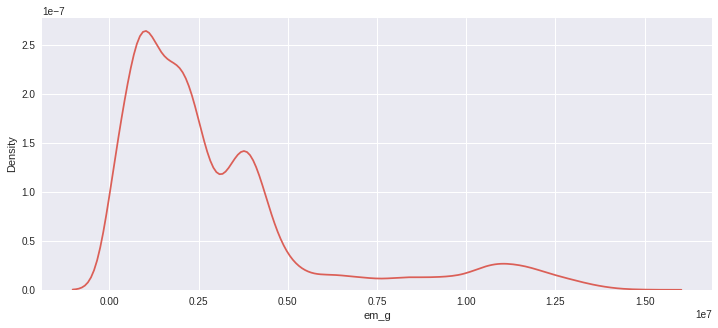

In [47]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df2['em_g'])
print('mean   >', df2['em_g'].mean())
print('median >', df2['em_g'].median())

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


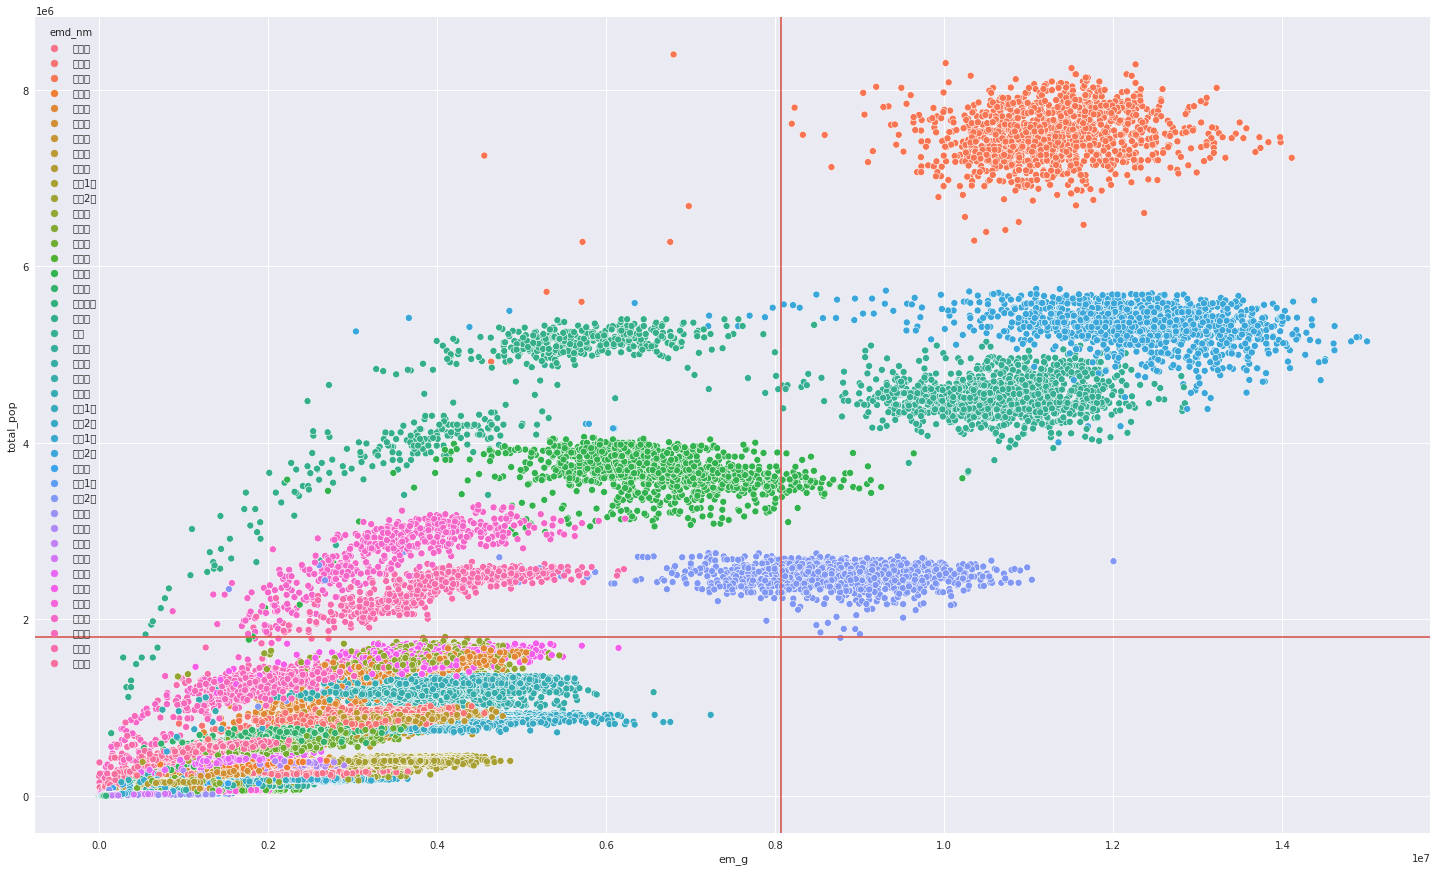

In [48]:
plt.figure(figsize=(25, 15))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['figure.figsize'] = (12, 8)
sns.scatterplot(x='em_g', y='total_pop', data=df2, hue='emd_nm')
plt.axvline(8070325, 0, 8000000)
plt.axhline(1800000, 0, 14000000)

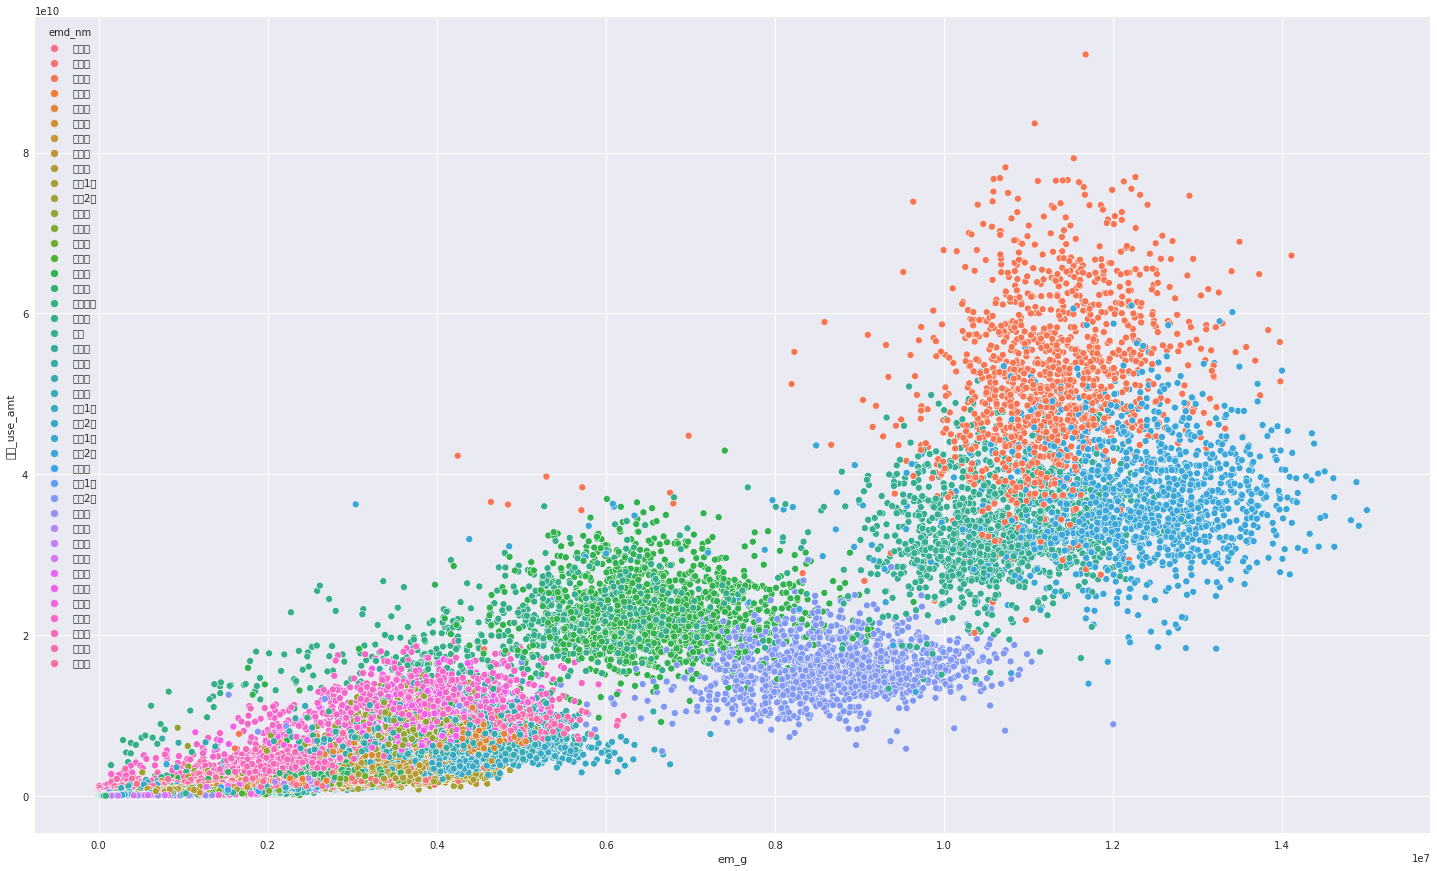

In [49]:
plt.figure(figsize=(25, 15))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['figure.figsize'] = (12, 8)
sns.scatterplot(x='em_g', y='외식_use_amt', data=df2, hue='emd_nm')

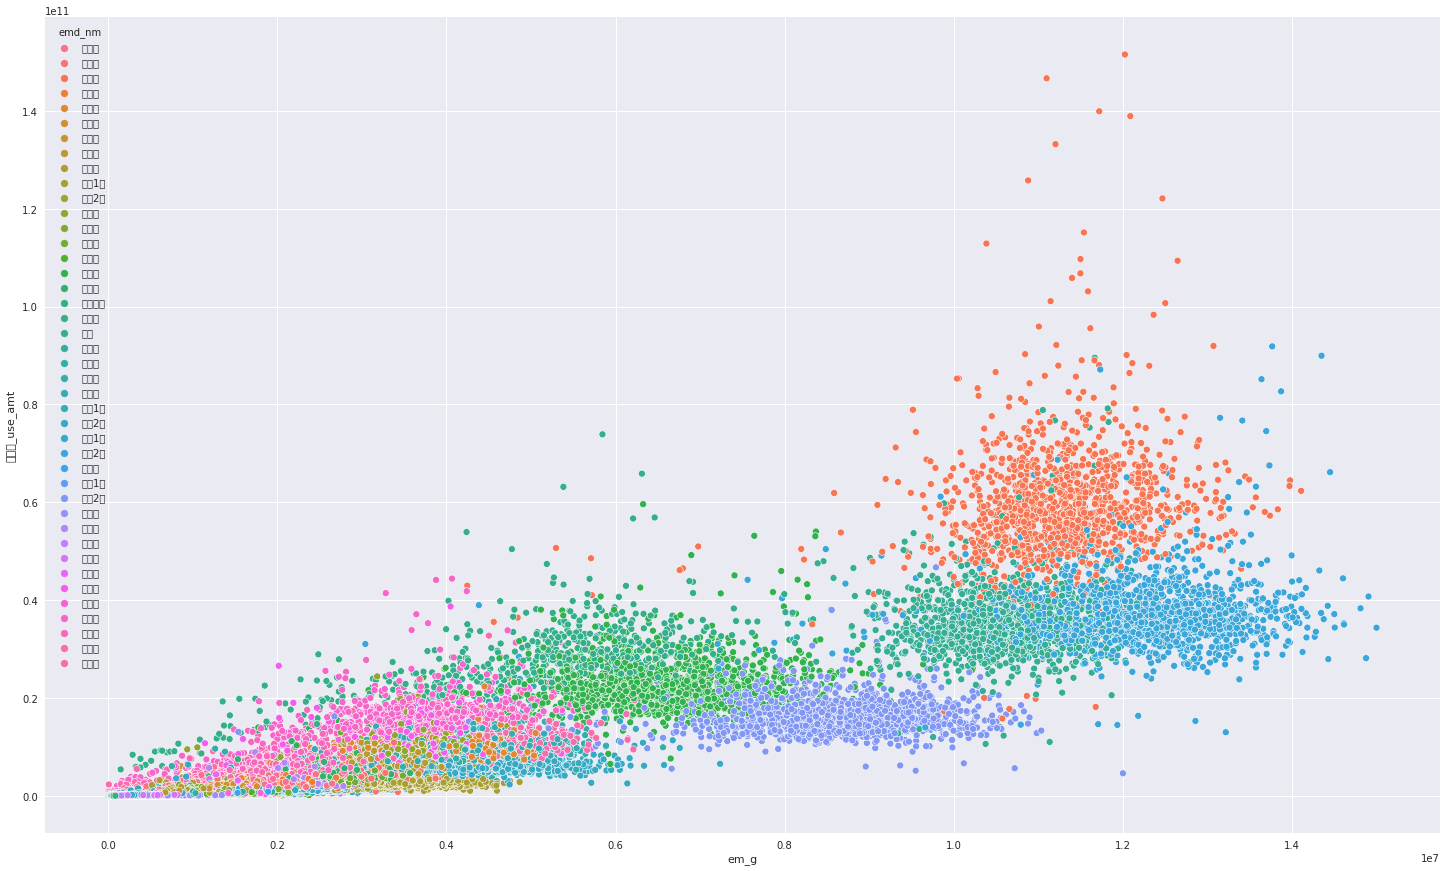

In [50]:
plt.figure(figsize=(25, 15))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['figure.figsize'] = (12, 8)
sns.scatterplot(x='em_g', y='장보기_use_amt', data=df2, hue='emd_nm')

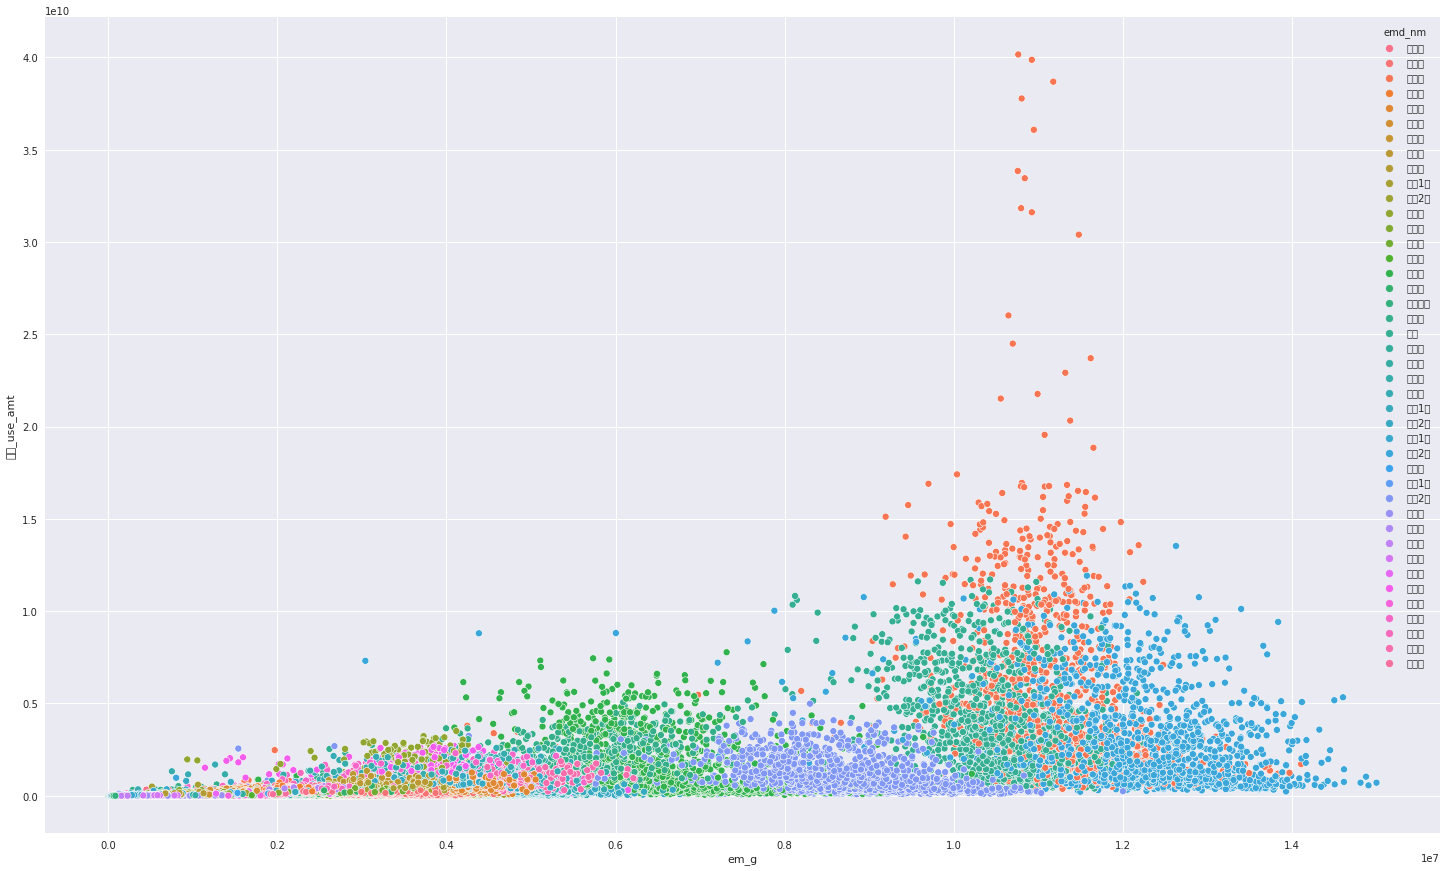

In [51]:
plt.figure(figsize=(25, 15))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['figure.figsize'] = (12, 8)
sns.scatterplot(x='em_g', y='배달_use_amt', data=df2, hue='emd_nm')

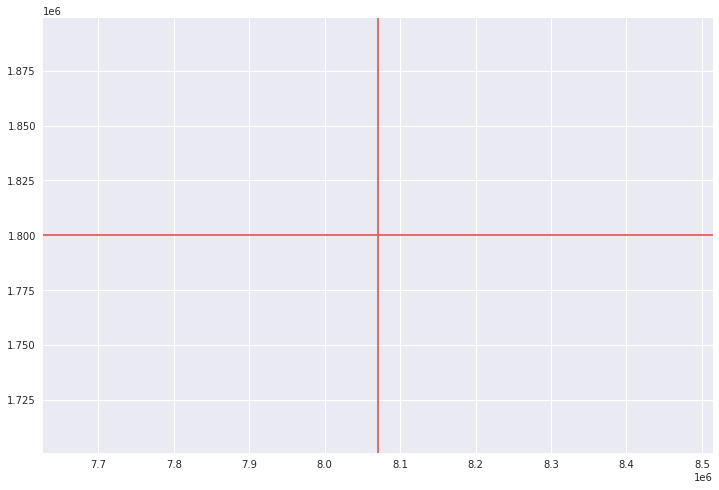

In [52]:
plt.axvline(8070325, 0, 8000000)
plt.axhline(1800000, 0, 14000000)

In [53]:
df2.head()

,base_date,base_year,base_month,emd_nm,emd_encoding,em_g,resid_reg_pop,foreign_pop,total_pop,외식_use_amt,장보기_use_amt,배달_use_amt
0,2018-01-01,2018.00000,1.00000,건입동,0,2783900.00000,274400.00000,6384.00000,280784.00000,1848308616.00000,1598653224.00000,3024560.00000
1,2018-01-01,2018.00000,1.00000,남원읍,2,2479200.00000,840928.00000,27632.00000,868560.00000,2229783336.00000,3820991504.00000,56688896.00000
2,2018-01-01,2018.00000,1.00000,노형동,3,11174800.00000,6884601.00000,204981.00000,7089582.00000,48387835242.00000,55169675358.00000,563970456.00000
3,2018-01-01,2018.00000,1.00000,대륜동,4,1637400.00000,269460.00000,3560.00000,273020.00000,1225606720.00000,1660200640.00000,15869120.00000
4,2018-01-01,2018.00000,1.00000,대정읍,5,1779900.00000,506040.00000,36432.00000,542472.00000,1431906816.00000,1981769520.00000,24581424.00000
